In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("IMDb Movies India.csv")

<Axes: >

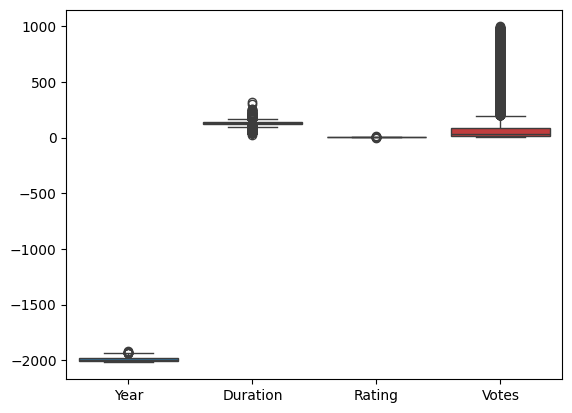

In [26]:
sns.boxplot(df)

In [3]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

In [5]:
df.isnull().sum()

Name           0
Year         529
Duration    8268
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2385
Actor 3     3153
dtype: int64

In [6]:
df.count()

Name        15509
Year        14980
Duration     7241
Genre       13632
Rating       7919
Votes        7920
Director    14984
Actor 1     13892
Actor 2     13124
Actor 3     12356
dtype: int64

In [7]:
df=df.dropna(subset=["Rating"])

In [8]:
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].fillna('Unknown')

In [9]:
df["Duration"]= df["Duration"].str.replace("min", " ").str.strip()
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [10]:
df["Votes"] = df["Votes"].str.replace(","," ").str.strip()
df["Votes"] = pd.to_numeric(df["Votes"], errors='coerce')

In [11]:

for col in ['Year', 'Duration', 'Votes']:
    df[col] = df[col].fillna(df[col].median())

In [12]:
# X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', ]]
# y = df['Rating']

In [13]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('demo', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
#     ]
# )
# ...existing code...
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration', 'Votes']]
y = df['Rating']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
    ],
    remainder='passthrough'  # This keeps numeric columns
)
# ...existing code...

In [14]:
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:

model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) 
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.8404198232323232
MSE: 1.2591064551767677
RMSE: 1.1220991289439484
R2 Score: 0.32274978018036293
